<a href="https://colab.research.google.com/github/ArnavTripathi1/WOC-7.0-PROJECT/blob/main/Multiclassification_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K Nearest Neighbor**



## **1. Loading Modules**







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **2. Importing and Handling Data**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')            # mounting google drive

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/multi_classification_train.csv', delimiter = ',')       # reading train set
df1 = df.drop(columns = ['ID'])
print(df1.shape)

(48000, 21)




`Dividing Data into Train, CV and Test Set`













In [ ]:
print('TRAIN SET')
print(df1.iloc[:38400])

print()
print()

print('CROSS VALIDATION SET')
print(df1.iloc[38400:43200])

print()
print()

print('TEST SET')
print(df1.iloc[43200:])

TRAIN SET
        Feature_1  Feature_2  Feature_3   Feature_4   Feature_5   Feature_6  \
0      -90.532634 -66.953472  79.261856 -111.800554  126.403549  111.509348   
1     -103.156720 -16.070400  87.819228   12.614599   51.347780   67.483725   
2       24.326153 -92.098078  82.238354  -56.795879   85.203996  127.916504   
3      -64.631737 -83.703583  84.135072   -5.516152   74.338494  112.630556   
4      -55.473830 -78.853237  88.129107   75.200543   76.991520   60.224711   
...           ...        ...        ...         ...         ...         ...   
38395  -45.530360  20.505481  90.252533  138.270800   91.603532  125.916310   
38396  -60.521765 -42.237328  90.369753  269.561863   92.076097   -5.283061   
38397  -92.806821 -10.345667  84.655842   55.862802   57.245586   22.425571   
38398  -56.680361 -55.998472  87.749697  395.280159   78.139892  139.756567   
38399  -48.095213  79.158835  86.852479   39.921551   15.855454   58.290488   

        Feature_7   Feature_8   Feature_9

In [ ]:
df_train = df.iloc[:38400]
df_cv = df.iloc[38400:43200]
df_test = df.iloc[43200:]




`Arranging Train Set as an array`




In [ ]:
features_train = df_train.loc[:, 'Feature_1':'Feature_20']

x_train = features_train.to_numpy()
y_train = df_train['Class'].to_numpy()

print(f"x_train = {x_train}")
print()
print(f"y_train = {y_train}")

x_train = [[ -90.53263395  -66.95347161   79.26185595 ...  -16.24229669
   -32.07492465  -17.66602617]
 [-103.15671956  -16.07040001   87.81922753 ...  -36.47974913
  -130.24661901  -44.14365222]
 [  24.32615256  -92.09807783   82.23835394 ... -130.94825564
   -43.11352279  -37.33044832]
 ...
 [ -92.80682054  -10.34566693   84.65584236 ...  -85.69619713
   -61.57697522  -65.30032143]
 [ -56.68036093  -55.99847164   87.74969696 ...   20.01134236
   -81.71489859  -13.08237026]
 [ -48.0952133    79.15883523   86.85247902 ...  -21.62817318
  -107.9304225   -56.44615414]]

y_train = [1 2 4 ... 2 2 1]


`x_train Normalization`

In [ ]:
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) / std

print(f"Normalized x_train = {x_train}")

Normalized x_train = [[-0.56571807 -0.57317719 -2.15388543 ...  0.67685993  1.7249436
   1.45285191]
 [-0.92033606  0.22120171  0.54538883 ... -0.0352828  -0.99102716
   0.44137434]
 [ 2.66073284 -0.96573101 -1.21500083 ... -3.35956782  1.41955506
   0.70164703]
 ...
 [-0.62960131  0.31057538 -0.45244609 ... -1.76717745  0.90875409
  -0.3668362 ]
 [ 0.3852122  -0.40214937  0.52345662 ...  1.95260181  0.35162801
   1.62795315]
 [ 0.62637405  1.70790627  0.2404448  ...  0.48733446 -0.37363803
  -0.02859623]]


## **3. Visualising the Data**

In [ ]:
Class_0 = np.sum(y_train == 0)
Class_1 = np.sum(y_train == 1)
Class_2 = np.sum(y_train == 2)
Class_3 = np.sum(y_train == 3)
Class_4 = np.sum(y_train == 4)

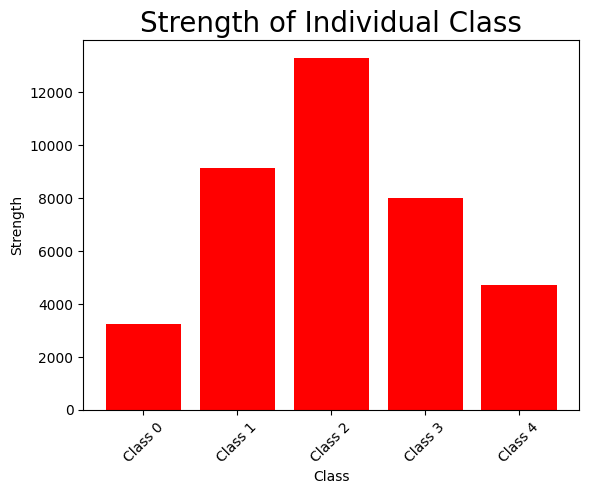

In [ ]:
Category = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
Value = [Class_0, Class_1, Class_2, Class_3, Class_4]

plt.bar(Category, Value, color = 'red')
plt.title('Strength of Individual Class', fontdict = {'fontsize' : 20})
plt.xlabel('Class')
plt.ylabel('Strength')

plt.xticks(rotation=45)
plt.show()

##**4. Model Initialization**

In [ ]:
m = x_train.shape[0]
n = x_train.shape[1]

## **Defining Distance**

In [ ]:
def distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

## **5. KNN**

In [ ]:

def knn(x_train, y_train, x, k=5):

  predictions = []


  for point in x:
    distances = []


    for i in range(len(x_train)):
        dist = distance(x_train[i], point)
        distances.append((dist, i))


    distances = sorted(distances, key=lambda x: x[0])
    neighbors = [y_train[i] for _, i in distances[:k]]


    class_count = {}
    for label in neighbors:
        class_count[label] = class_count.get(label, 0) + 1


    sorted_classes = sorted(class_count.items(), key=lambda x: x[1], reverse=True)
    predictions.append(sorted_classes[0][0])

  return np.array(predictions)

##**6. Cross Validation Set**

In [ ]:
features_cv = df_cv.loc[:, 'Feature_1':'Feature_20']

x_cv = features_cv.to_numpy()
y_cv = df_cv['Class'].to_numpy()

`Same Normalization`

In [ ]:
x_cv = (x_cv - mean) / std

print(f"x_cv = {x_cv}")
print(f"y_cv = {y_cv}")

x_cv = [[-1.13263993  1.23941198 -1.76222748 ...  0.2001453  -1.90688151
   1.75815523]
 [-1.90969546  0.62818622 -0.85769514 ... -0.15501583  0.29594054
  -1.3649632 ]
 [ 1.64059367  0.52485991  1.24011541 ...  1.30044233 -0.68464583
  -0.43207938]
 ...
 [ 1.1388733  -0.5401856   0.69905754 ... -1.54336691 -0.58575394
  -0.35818865]
 [ 0.69265917  0.56080492 -0.19534578 ...  0.24285602  0.39064773
   0.62929332]
 [ 0.58260271  0.60650702  0.60208354 ...  0.86180169 -0.12718634
  -0.15497566]]
y_cv = [1 3 3 ... 2 2 3]


`Testing on CV Set`

In [ ]:
m_cv = x_cv.shape[0]

In [ ]:
pred_cv = knn(x_train, y_train, x_cv, k=5)

print(f"Predicted Class = {pred_cv}")

Predicted Class = [1 3 3 ... 2 1 3]


`Accuracy`

In [ ]:
count_cv = 0
for i in range(m_cv):

  if pred_cv[i] == y_cv[i]:
    count_cv += 1
  else:
    count_cv += 0

accuracy_cv = count_cv / m_cv

print(f"Accuracy for Cross Validation Set = {accuracy_cv * 100}%")

Accuracy for Cross Validation Set = 95.47916666666667%


##**7. Test Set**

In [ ]:
features_test = df_test.loc[:, 'Feature_1':'Feature_20']

x_test = features_test.to_numpy()
y_test = df_test['Class'].to_numpy()

`Testing on Test Set`

In [ ]:
m_test = x_test.shape[0]

In [ ]:
pred_test = knn(x_train, y_train, x_test, k=5)

print(f"Predicted Class = {pred_cv}")

Predicted Class = [1 3 3 ... 2 1 3]


`Accuracy`

In [ ]:
count_test = 0

for i in range(m_test):

  if pred_test[i] == y_test[i]:
    count_test += 1
  else:
    count_test += 0

accuracy_test = count_test / m_test

print(f'Accuracy of Test Set = {accuracy_test * 100}%')

Accuracy of Test Set = 72.5%


##**8. F1 Score**

In [ ]:
def precision_recall_multiclass(y_true, y_pred, num_classes):
    precision_per_class = []
    recall_per_class = []

    for i in range(num_classes):

        TP = np.sum((y_true == i) & (y_pred == i))

        FP = np.sum((y_true != i) & (y_pred == i))

        FN = np.sum((y_true == i) & (y_pred != i))

        precision = TP / (TP + FP) if (TP + FP) != 0 else 0.0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0.0

        precision_per_class.append(precision)
        recall_per_class.append(recall)

    return precision_per_class, recall_per_class

`Precision - Recall for CV Set`

In [ ]:
num_classes = 5

precision, recall = precision_recall_multiclass(y_cv, pred_cv, num_classes)

for i in range(num_classes):
    print(f"Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}")

macro_precision = np.mean(precision)
macro_recall = np.mean(recall)

print()
print(f"Macro-Averaged Precision: {macro_precision:.4f}")
print(f"Macro-Averaged Recall: {macro_recall:.4f}")

Class 0: Precision = 0.9444, Recall = 0.8303
Class 1: Precision = 0.9576, Recall = 0.9744
Class 2: Precision = 0.9650, Recall = 0.9795
Class 3: Precision = 0.9383, Recall = 0.9589
Class 4: Precision = 0.9561, Recall = 0.9208

Macro-Averaged Precision: 0.9523
Macro-Averaged Recall: 0.9328


`F1 Score`

In [ ]:
F1 = 2 * (macro_precision * macro_recall) / (macro_precision + macro_recall)

print(f"F1 Score = {F1}")

F1 Score = 0.9424415836730939


##**9. Predictions for Offcial Test Set**

`Set`

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/multi_classification_test.csv', delimiter = ',')       # reading train set
df2 = df_test.drop(columns = ['ID'])
print(df2.shape)

(12000, 20)


In [ ]:
features_test = df2.loc[:, 'Feature_1':'Feature_20']
x_test = features_test.to_numpy()


print(f"x_test = {x_test}")

x_test = [[ -53.83734971  -32.6458895    88.65670437 ...  -31.84478415
   -80.67009828  -68.25705001]
 [ -72.69804275  137.18652565   85.12206387 ...  -22.11370932
   -57.31145453  -74.07616736]
 [ -87.37675817   52.29202943   82.28503619 ...  -49.4246242
   -76.5380021   -35.69448307]
 ...
 [ -68.19346585  -29.41732628   89.77885938 ...   -9.40912862
  -108.54906248  -73.00628847]
 [-106.53373787  -99.18908011   82.97141713 ...  -31.47872486
  -109.73942126 -127.29108315]
 [ -88.03119387  -21.02195308   83.67580673 ...  -26.31964756
   -84.08287989  -30.13499549]]


`Same Normalization`

In [ ]:
x_test = (x_test - mean) / std

print(f'Normalized x_test = {x_test}')

Normalized x_test = [[ 0.46507406 -0.03757235  0.80955636 ...  0.12781859  0.38053295
  -0.47978684]
 [-0.06473391  2.61382588 -0.30538461 ...  0.47024876  1.02676193
  -0.70208421]
 [-0.47706766  1.28846572 -1.20027572 ... -0.49080449  0.49484954
   0.76414289]
 ...
 [ 0.06180231  0.01283149  1.16352067 ...  0.91731465 -0.39075303
  -0.66121353]
 [-1.0151985  -1.07643468 -0.98376878 ...  0.14069998 -0.42368492
  -2.73495883]
 [-0.49545115  0.1438988  -0.76158131 ...  0.32224454  0.28611658
   0.97652209]]


`Predictions`

In [ ]:
m_test = x_test.shape[0]

In [ ]:
predictions = knn(x_train, y_train, x_test, k=5)

print(f"Predicted Class = {predictions}")

Predicted Class = [3 1 1 ... 3 4 1]


`Saving Predictions`

In [ ]:
# df = pd.DataFrame(predictions)
# df.columns = ['Prediction_multiclassification']
# df.to_csv('/content/drive/MyDrive/knn_multiclassification_test_prediction.csv', index=False)